In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report

In [2]:
path = 'ex2data1.txt'
df = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])

In [3]:
df.head()


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


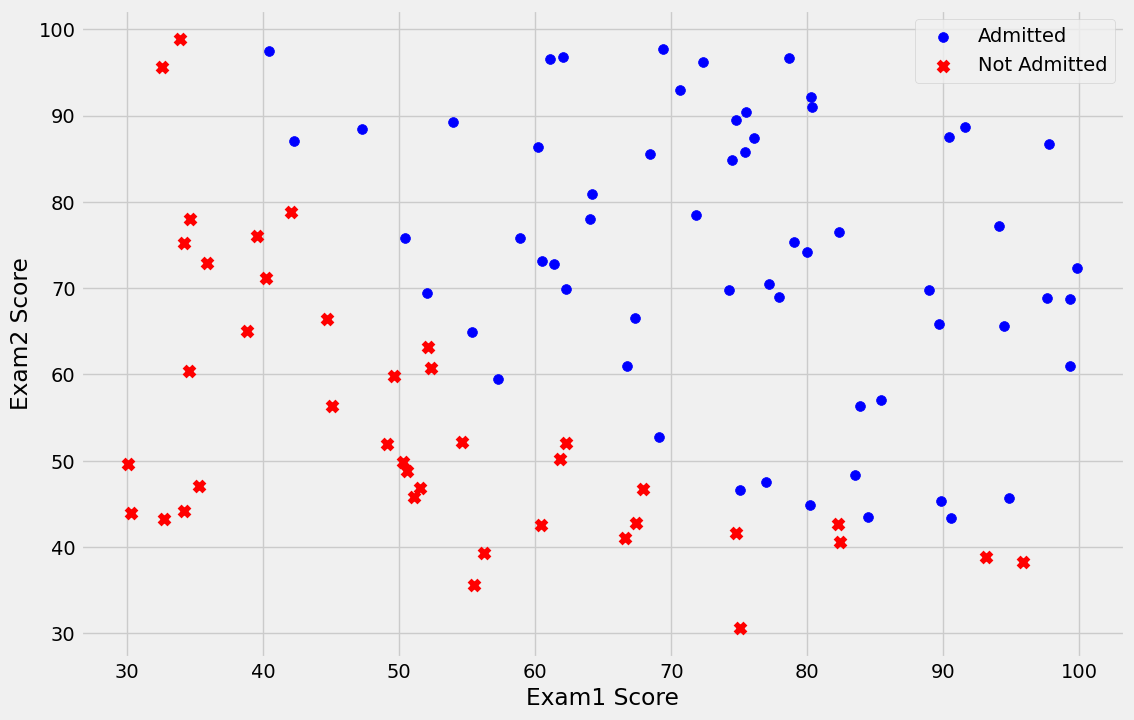

In [4]:
ones = df[df['admitted'].isin([1])]
zeros = df[df['admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(ones['exam1'], ones['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(zeros['exam1'], zeros['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()


In [5]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_Y(df) -> np.ndarray:
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())


In [6]:
X = get_X(df)
Y = get_Y(df)
print(X.shape, Y.shape)

(100, 3) (100,)


## Sigmoid 函数
$g$ 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$
合起来，我们得到逻辑回归模型的假设函数： 
	${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$

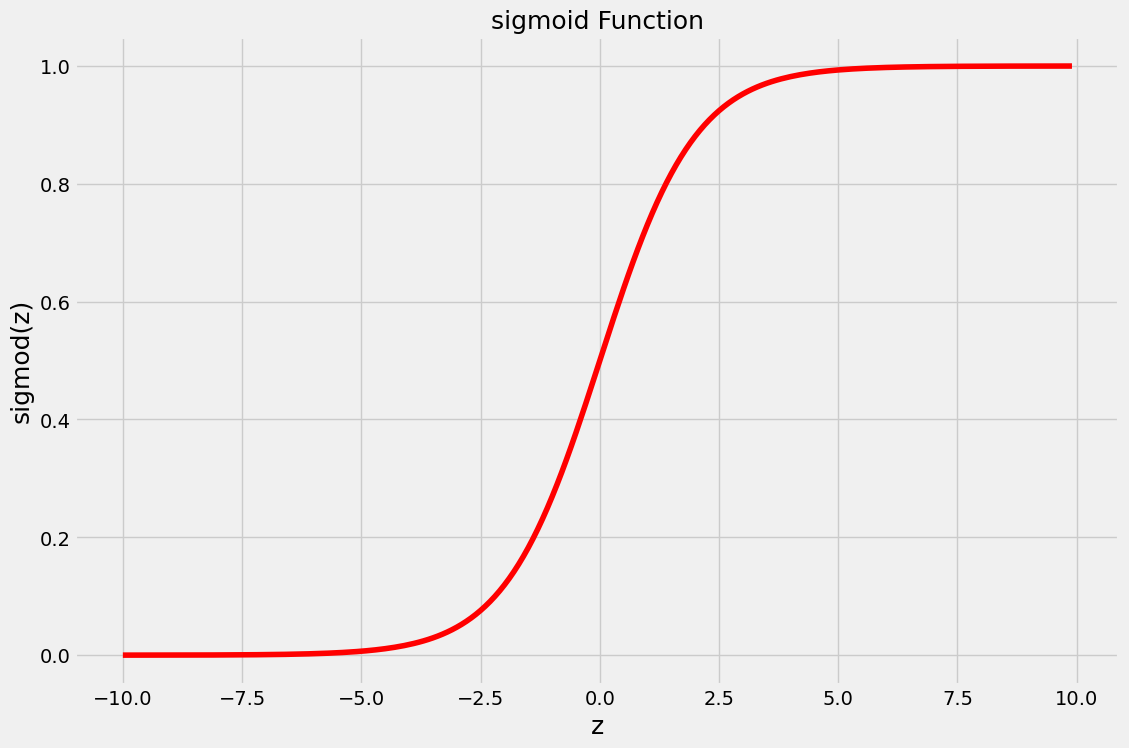

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=0.1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('sigmod(z)', fontsize=18)
ax.set_title('sigmoid Function', fontsize=18)
plt.show()

In [8]:
def cost(theta, X, Y):
    return np.mean(-Y * np.log(sigmoid(X @ theta)) - (1 - Y)*np.log(1 - sigmoid(X @ theta)))

In [9]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [10]:
cost(theta, X, Y)

0.6931471805599453

## Gradient descent 梯度下降
* 这是批量梯度下降（batch gradient descent）
* 转化为向量化计算：$\frac{1}{m}X^T(Sigmoid(X_\theta)-y)$
$$\frac{\partial J\left( \theta \right)}{\theta_j}=\frac{1}{m}\left( h_{\theta}(x^{(i)}) - y^{(i)}\right)x^{(i)}_j$$

In [11]:
def gradient(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y).T
    print("X.shape = ", X.shape)
    print("Y.shape = ", Y.shape)
    print("theta.shape = ", theta.shape)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X @ theta.T) - Y
    print("error's shape = ", error.shape)
    for i in range(parameters):
        term = X[:, i].T @ error
        grad[i] = term / len(X)
        
    return grad

In [12]:
type(gradient(theta, X, Y))

X.shape =  (100, 3)
Y.shape =  (100, 1)
theta.shape =  (1, 3)
error's shape =  (100, 1)


E:\temp\ipykernel_16796\1390215889.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = term / len(X)


numpy.ndarray

In [13]:
def gradient2(theta, X, Y):
    return (1 / len(X)) * X.T @(sigmoid(X @ theta) - Y)

In [14]:
gradient2(theta, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

In [16]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, Y), method="Newton-CG", jac=gradient2)

In [17]:
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.20349770654887073
       x: [-2.516e+01  2.062e-01  2.014e-01]
     nit: 28
     jac: [ 9.173e-06  4.865e-04  4.405e-04]
    nfev: 72
    njev: 186
    nhev: 0


In [18]:
cost(res.x, X, Y)

0.20349770654887073

In [19]:
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x>=0.5 else 0 for x in probability]

In [21]:
theta_min = res.x
predictions = predict(theta_min, X)

correct = [1 if a == b else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))
print(classification_report(Y,predictions))

accuracy = 89%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [22]:
x1 = np.arange(130, step=0.1)
coef = -(res.x / res.x[2])
x2 = coef[0] + coef[1]*x1

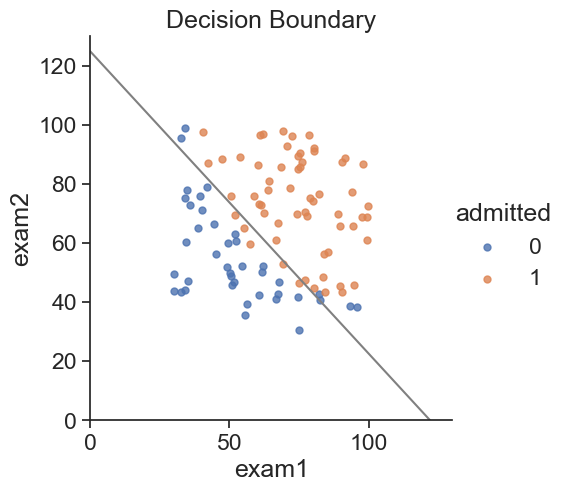

In [31]:
import seaborn as sns
sns.set_theme(context="notebook", style="ticks", font_scale=1.5)
sns.lmplot(x = 'exam1', y = 'exam2', data=df, hue="admitted", fit_reg=False, scatter_kws={"s":25})
plt.plot(x1, x2, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title("Decision Boundary")
plt.show()

In [32]:
data2 = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


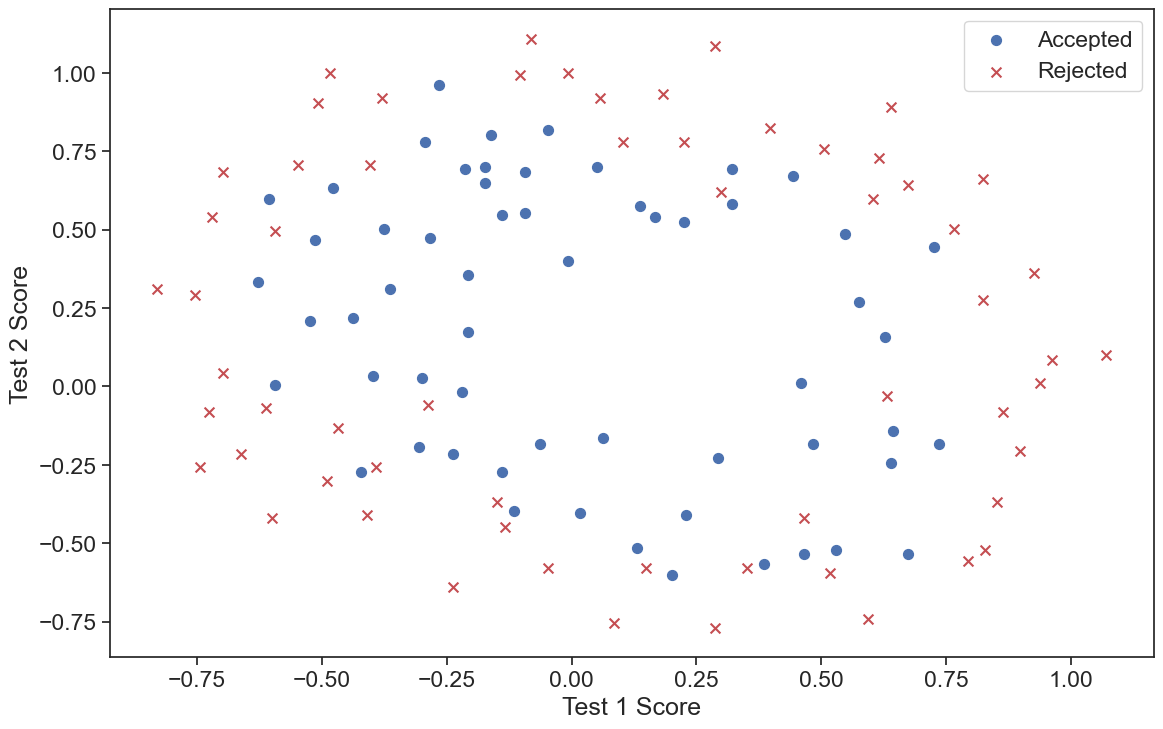

In [33]:
positive = data2[data2['accepted'] == 1]
negative = data2[data2['accepted'] == 0]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [37]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {"f{}{}".format(i-p, p): np.power(x, i - p) * np.power(y, p)
            for i in np.arange(power+1)
            for p in np.arange(i + 1)}
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [38]:
degree = 5
x1 = np.array(data2.test1)
x2 = np.array(data2.test2)
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [40]:
theta = np.zeros(data.shape[1])
X2 = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X2.shape)
Y2 = get_Y(data2)
print(Y2.shape)

(118, 28)
(118,)


In [41]:
def regularized_cost(theta, X, Y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (1 / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()
    return cost(theta, X, Y) + regularized_term

In [42]:
regularized_cost(theta, X2, Y2, l=1)

0.6931471805599454

In [54]:
def regularized_gradient(theta, X, Y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (1 / len(X)) * theta_j1_to_n
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient2(theta, X, Y) + regularized_term

In [55]:
regularized_gradient(theta, X2, Y2)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [56]:
learningRate = 1

In [57]:
regularized_cost(theta, X2, Y2, learningRate)

0.6931471805599454

In [58]:
import scipy.optimize as opt
print('init cost = {}'.format(regularized_cost(theta, X2, Y2)))
res = opt.minimize(fun=regularized_cost, x0=theta, args=(X2, Y2), method="Newton-CG", jac=regularized_gradient)
res

init cost = 0.6931471805599454


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.529002729712873
       x: [ 1.273e+00  6.253e-01 ... -1.439e-01 -9.247e-01]
     nit: 6
     jac: [-2.387e-07  9.657e-08 ...  5.014e-09 -2.276e-08]
    nfev: 8
    njev: 68
    nhev: 0

In [59]:
final_theta = res.x
y_pred = predict(final_theta, X2)
print(classification_report(Y2, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



In [61]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, Y2.ravel())

LogisticRegression()

In [62]:
model.score(X2, Y2)

0.8305084745762712

In [78]:
def feature_mapping_logistic_regression(power, l):
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_Y(df)
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x
    return final_theta

In [79]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x,y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    inner_product = mapped_cord.values @ theta
    decision = mapped_cord[np.abs(inner_product) < threshhold]
    return decision.f10, decision.f01

In [80]:
def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10**-3
    
    final_theta = feature_mapping_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot(x='test1', y='test2', hue = 'accepted' ,data=df, fit_reg=False, scatter_kws={'s':100})
    
    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()

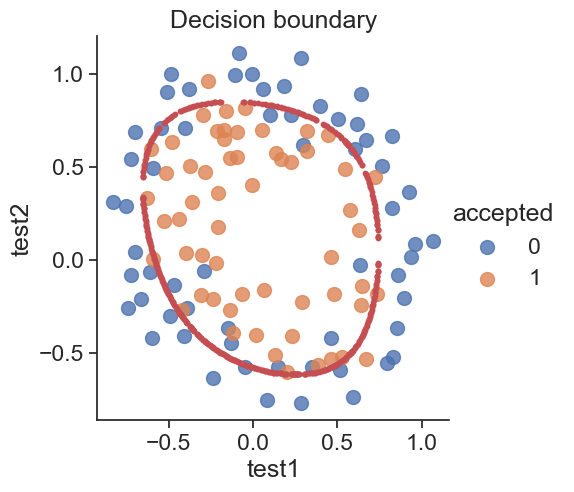

In [81]:
draw_boundary(power=6, l=1)

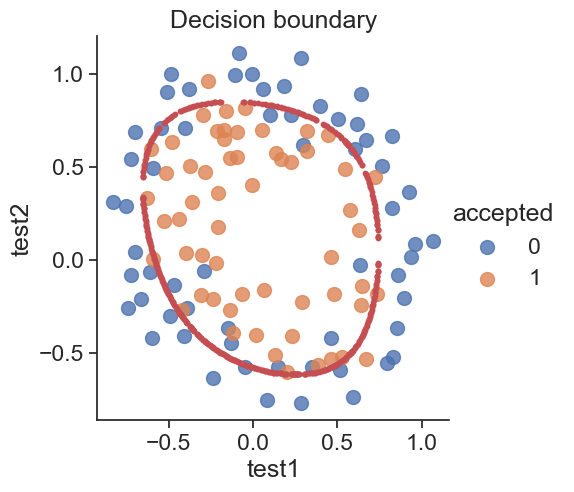

In [82]:
draw_boundary(power=6, l=0)

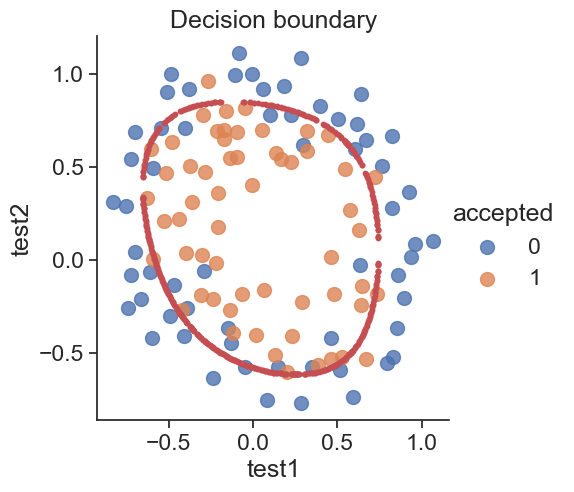

In [83]:
draw_boundary(power=6, l=100)